3. Dependence of price VS. hasElevator
4. Dependence price for standard flat rent vs time 
5. Price vs centerDistance
6. Comparison for both rent and purchase

3. Dependence of price VS. hasElevator for each city


Index(['Unnamed: 0', 'id', 'city', 'type', 'squareMeters', 'rooms', 'floor',
       'floorCount', 'buildYear', 'latitude', 'longitude', 'centreDistance',
       'poiCount', 'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price', 'Period', 'buildingAge'],
      dtype='object')
Data for rent


C:\Users\oktaw\AppData\Local\Temp\ipykernel_11232\4091492819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_cleaned,x="hasElevator",y="price",inner="box",palette="coolwarm")


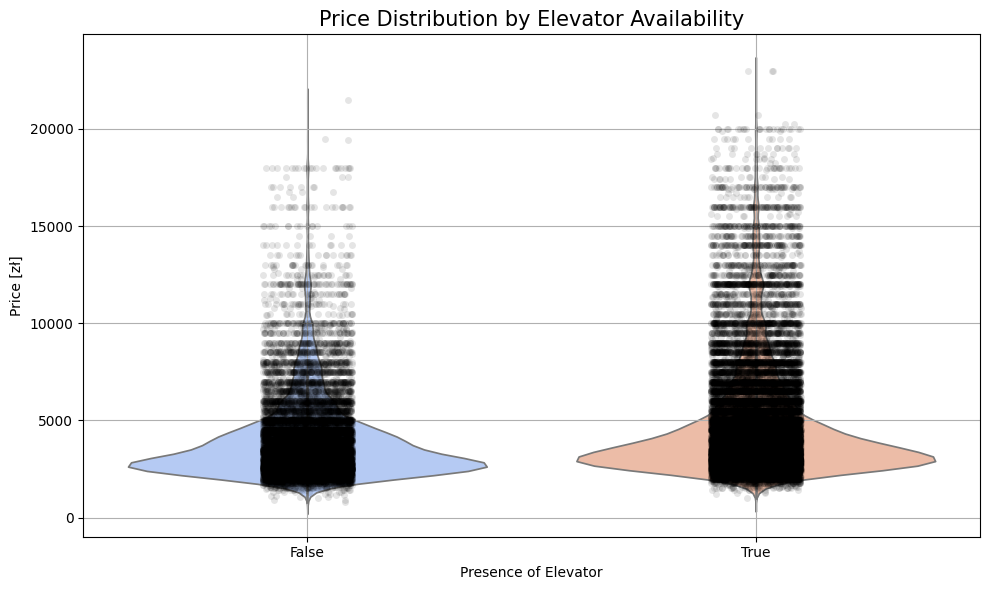

Mann-Whitney U test p-value:0.000000
There is strong evidence that prices differ with elevator presence
T-statistic:30.6781 P-value: 0.0000
Strong evidence of real differnce (based on t-statistic value)
D-statistic:  0.1319515793745294
Cliff's Delta: 0.17599353561774336 Effect size interpretation: small
Cliff's Delta suggest small effect
Data for purchase


C:\Users\oktaw\AppData\Local\Temp\ipykernel_11232\4091492819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_cleaned,x="hasElevator",y="price",inner="box",palette="coolwarm")


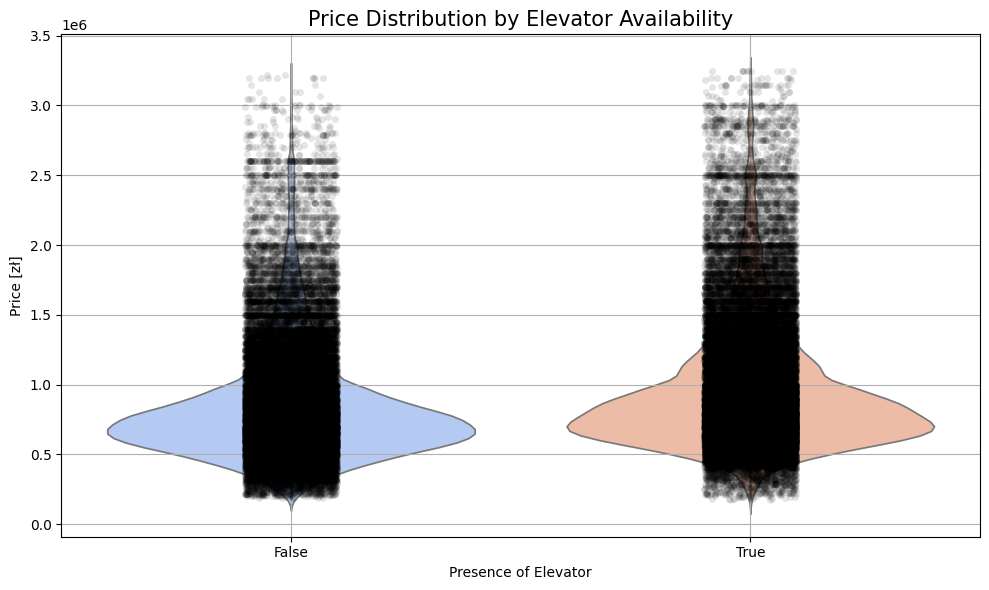

Mann-Whitney U test p-value:0.000000
There is strong evidence that prices differ with elevator presence
T-statistic:48.1275 P-value: 0.0000
Strong evidence of real differnce (based on t-statistic value)
D-statistic:  0.14064808637148513
Cliff's Delta: 0.1907997532413743 Effect size interpretation: small
Cliff's Delta suggest small effect


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
import cliffs_delta


path="./../data/processed/"
files=os.listdir(path)
eg=pd.read_csv(path+files[0])
print(eg.columns)

for file in files:
    print("Data for "+file[12:-4])
    data_cleaned=pd.read_csv(path+file)
    plt.figure(figsize=(10,6))
    sns.violinplot(data=data_cleaned,x="hasElevator",y="price",inner="box",palette="coolwarm")
    sns.stripplot(data=data_cleaned, y="price", x="hasElevator", color="black",alpha=0.1,jitter=True)
    plt.title("Price Distribution by Elevator Availability", fontsize=15)
    plt.xlabel("Presence of Elevator")
    plt.ylabel("Price [zł]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #Mann-Whitney U
    elevator=data_cleaned[data_cleaned['hasElevator']==True]['price']

    no_elevator=data_cleaned[data_cleaned['hasElevator']==False]['price']
    stat,p=mannwhitneyu(elevator,no_elevator,alternative="two-sided")
    print(f"Mann-Whitney U test p-value:{p:4f}")
    if p < 0.05:
        print("There is strong evidence that prices differ with elevator presence")
    elif p>=0.05:
        print("Presence of elevator doesn't significantly impact price in this sample")
    else:
        print("Something is wrong")
    #T-test
    t_stat,p=ttest_ind(elevator,no_elevator,equal_var=False)
    print(f"T-statistic:{t_stat:.4f}", f"P-value: {p:.4f}")
    if abs(t_stat) < 1:
        print("Small statistical confidence")
    elif abs(t_stat) < 1.96:
        print("May be significant at 95% confidence")
    elif abs(t_stat) < 2.58:
        print("May be significant at 99% confidence")
    else:
        print("Strong evidence of real differnce (based on t-statistic value)")
    
    #Kolmogorov-Smirnov Test (continuous data)
    ks_stat,p=ks_2samp(elevator,no_elevator)
    print("D-statistic: ",ks_stat)#D-statistic measues the maximum abolute difference beteen the cumulative distribution functions of two samples, range 0-1, near 1 -> distiubutions are very differeny particulary in their shapes
    
    #Cliff's Delta (from -1 to 1 range)
    delta,res=cliffs_delta.cliffs_delta(elevator.tolist(),no_elevator.tolist())
    print(f"Cliff's Delta: {delta}",f"Effect size interpretation: {res}")
    if abs(delta)<0.147:
        print("Cliff's Delta suggest neglible effect")
    elif 0.147<=abs(delta)<0.33:
        print("Cliff's Delta suggest small effect")
    elif 0.33<=abs(delta) <0.474:
        print("Cliff's Delta suggest medium effect")
    elif abs(delta) >= 0.0474:
        print("Cliff's Delta suggest large effect")









